In [10]:
# Importing Libraries
import numpy as np 
import pickle as pkl 
import tensorflow as tf 
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm
from PIL import Image

In [3]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
print(len(filenames))
print(filenames[1])

44441
images\10001.jpg


In [14]:
# Importing ResNet50 Model and Configuration
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False 
model = tf.keras.models.Sequential([model,
                                    GlobalMaxPool2D(),])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [15]:
def extract_features_from_images(image_path,model):
    # Extracting Features from Image
    # Load the image and resize it to the required size
    img = image.load_img(image_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand the dimensions to include the batch dimension
    img_expand_dim = np.expand_dims(img_array, axis=0)

    # Preprocess the image for the model
    img_preprocess = preprocess_input(img_expand_dim)

    # Extract features using the model
    result = model.predict(img_preprocess).flatten()

    # Print the shape of the result
    print(result.shape)
    # Make all data in the result between 0 and 1
    norm_result = result/norm(result)
    return norm_result

In [16]:
extract_features_from_images(filenames[0],model)

1/1 [==============================] - 5s 5s/step
(2048,)


array([0.        , 0.01761621, 0.00171601, ..., 0.01247231, 0.02726381,
       0.06899235], dtype=float32)

In [17]:
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file,model))
image_features

1/1 [==============================] - 0s 349ms/step
(2048,)
1/1 [==============================] - 0s 349ms/step
(2048,)
1/1 [==============================] - 0s 417ms/step
(2048,)
1/1 [==============================] - 1s 571ms/step
(2048,)
1/1 [==============================] - 0s 408ms/step
(2048,)
1/1 [==============================] - 0s 369ms/step
(2048,)
1/1 [==============================] - 0s 343ms/step
(2048,)
1/1 [==============================] - 0s 342ms/step
(2048,)
1/1 [==============================] - 0s 367ms/step
(2048,)
1/1 [==============================] - 0s 495ms/step
(2048,)
1/1 [==============================] - 0s 436ms/step
(2048,)
1/1 [==============================] - 0s 471ms/step
(2048,)
1/1 [==============================] - 0s 431ms/step
(2048,)
1/1 [==============================] - 0s 377ms/step
(2048,)
1/1 [==============================] - 0s 423ms/step
(2048,)
1/1 [==============================] - 1s 540ms/step
(2048,)
1/1 [===================

KeyboardInterrupt: 

In [18]:
Image_features = pkl.dump(image_features,open('Images_features.pkl','wb'))

In [19]:
filenames = pkl.dump(filenames,open('filenames.pkl','wb'))

In [ ]:
# Loading Pickle Files

In [20]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [21]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [22]:
np.array(Image_features).shape

(61, 2048)

In [23]:
np.array(filenames).shape

(44441,)

In [ ]:
# Finding Similar Images

In [24]:
neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')

In [25]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [27]:
input_image = extract_features_from_images('10009.jpg',model)

1/1 [==============================] - 0s 425ms/step
(2048,)


In [28]:
distance,indices = neighbors.kneighbors([input_image])

In [29]:
indices

array([[ 9,  8, 13, 32, 31, 30]], dtype=int64)

In [30]:
from IPython.display import Image

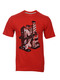

In [32]:
# Print the images 
Image('10009.jpg')

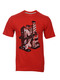

In [33]:
Image(filenames[indices[0][0]])

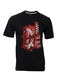

In [34]:
Image(filenames[indices[0][1]])

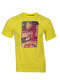

In [35]:
Image(filenames[indices[0][2]])

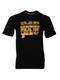

In [36]:
Image(filenames[indices[0][3]])

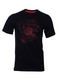

In [37]:
Image(filenames[indices[0][4]])

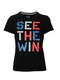

In [38]:
Image(filenames[indices[0][5]])